In [5]:
import pandas as pd
import numpy as np

In [6]:
train_data=pd.read_csv("sales_train.csv")

print(train_data)

In [4]:
train_data.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day'],
      dtype='object')

In [13]:
x=train_data["shop_id"].unique()

In [15]:
x.sort()
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59], dtype=int64)

In [1]:
import matplotlib.pyplot as plt


In [7]:
train_data.max()

date              31.12.2014
date_block_num            33
shop_id                   59
item_id                22169
item_price            307980
item_cnt_day            2169
dtype: object

In [9]:
import seaborn as sns

In [12]:
sns.set({'figure.figsize':(12,6)})


In [13]:
train_data.set_index(train_data.columns[0])

,date_block_num,shop_id,item_id,item_price,item_cnt_day
date,,,,,
02.01.2013,0,59,22154,999.00,1.0
03.01.2013,0,25,2552,899.00,1.0
05.01.2013,0,25,2552,899.00,-1.0
06.01.2013,0,25,2554,1709.05,1.0
15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...
10.10.2015,33,25,7409,299.00,1.0
09.10.2015,33,25,7460,299.00,1.0
14.10.2015,33,25,7459,349.00,1.0


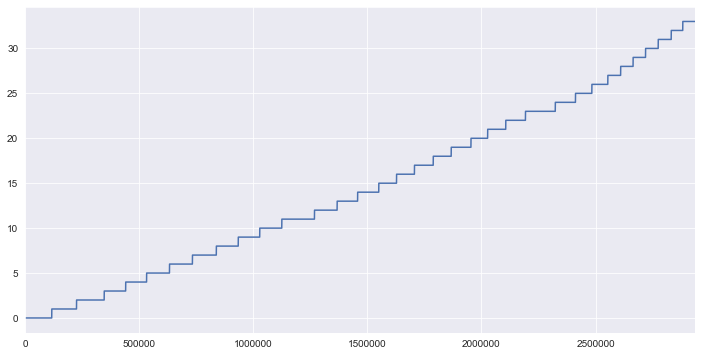

In [17]:
train_data["date_block_num"].plot()

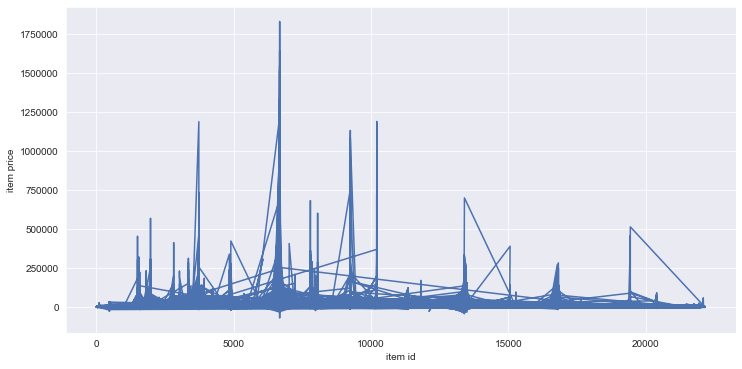

In [18]:
plt.xlabel("item id")
plt.ylabel("item price")
plt.plot(train_data.item_id,(train_data.item_cnt_day*train_data.item_price))
plt.show()

In [27]:
grouped=pd.DataFrame(train_data.groupby(['date_block_num'])['item_cnt_day'].sum().reset_index())


In [28]:
pd.options.display.max_rows=999
grouped.head(100)

,date_block_num,item_cnt_day
0,0,131479.0
1,1,128090.0
2,2,147142.0
3,3,107190.0
4,4,106970.0
5,5,125381.0
6,6,116966.0
7,7,125291.0
8,8,133332.0
9,9,127541.0


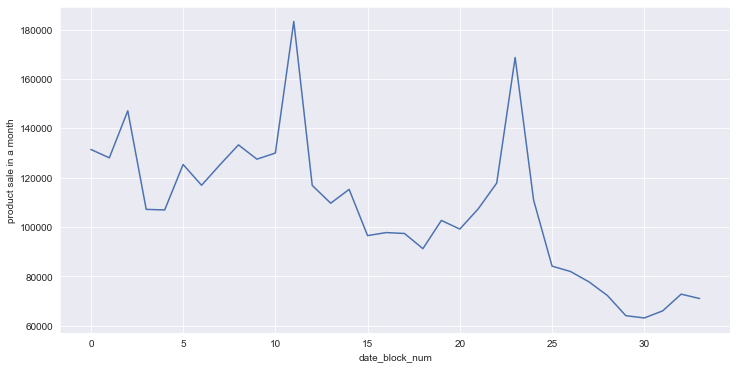

In [29]:
plt.xlabel("date_block_num")
plt.ylabel("product sale in a month")
plt.plot(grouped.date_block_num,grouped.item_cnt_day)
plt.show()

In [35]:
grouped2=pd.DataFrame(train_data.groupby(['shop_id'])['item_cnt_day'].sum().reset_index())

In [36]:
grouped2

,shop_id,item_cnt_day
0,0,11705.0
1,1,6311.0
2,2,30620.0
3,3,28355.0
4,4,43942.0
5,5,42762.0
6,6,100489.0
7,7,67058.0
8,8,3595.0
9,9,15866.0


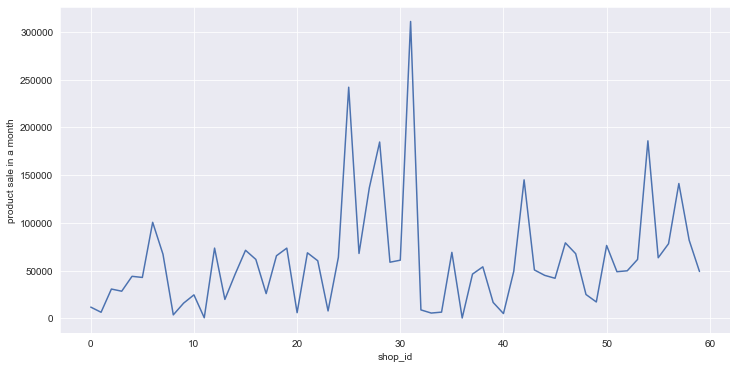

In [37]:
plt.xlabel("shop_id")
plt.ylabel("product sale in a month")
plt.plot(grouped2.shop_id,grouped2.item_cnt_day)
plt.show()

In [86]:
x=pd.DataFrame((train_data["shop_id"],train_data["item_cnt_day"]*train_data["item_price"]),index=['shop_id','revenue'])

In [85]:
x

,0,1,2,3,4,5,6,7,8,9,...,2935839,2935840,2935841,2935842,2935843,2935844,2935845,2935846,2935847,2935848
0,59.0,25.0,25.0,25.00,25.0,25.0,25.0,25.0,25.0,25.0,...,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0
1,999.0,899.0,-899.0,1709.05,1099.0,349.0,549.0,239.0,299.0,897.0,...,399.0,299.0,349.0,749.0,299.0,299.0,299.0,349.0,299.0,299.0


In [88]:
y=x.transpose()


,shop_id,revenue
0,59.0,999.00
1,25.0,899.00
2,25.0,-899.00
3,25.0,1709.05
4,25.0,1099.00
...,...,...
2935844,25.0,299.00
2935845,25.0,299.00
2935846,25.0,349.00
2935847,25.0,299.00


In [89]:
grouped3=pd.DataFrame(y.groupby(['shop_id'])['revenue'].sum().reset_index())

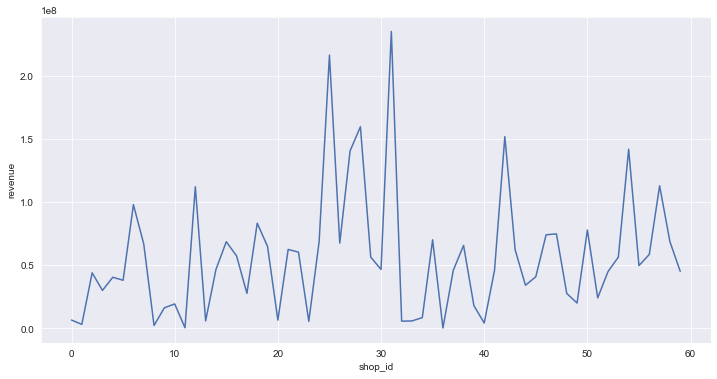

In [91]:
plt.xlabel("shop_id")
plt.ylabel("revenue")
plt.plot(grouped3.shop_id,grouped3.revenue)
plt.show()